<a href="https://colab.research.google.com/github/GuilhermeFogolin/Estudos-Dados-FECAP/blob/main/04_Consumindo_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests

url='https://www.uol.com.br'

dados = requests.get(url)
print(dados.status_code)
dados.content

In [ ]:
import requests
url='https://bloomberg-market-and-financial-news.p.rapidapi.com/market/get-movers'
dados = requests.get(url,params= {"id": 'nky:ind', "template": 'INDEX'}, headers= {
    'X-RapidAPI-Key': '7395c74fcdmshc55eca2cd2c9a8cp1901a1jsn9d93900b7993',
    'X-RapidAPI-Host': 'bloomberg-market-and-financial-news.p.rapidapi.com'
  })
dados.content

In [3]:
print(dados.json())

{'active': [{'securityType': 'Common Stock', 'symbol': '9501', 'exchange': 'Tokyo', 'country': 'Japan', 'currency': 'JPY', 'resourceType': 'Company', 'fundamentalDataCurrency': 'JPY', 'resourceSubtype': 'Public', 'region': 'APAC', 'ticker': '9501:jp', 'tickerName': '9501:JP', 'template': 'Stock', 'tinyName': 'Tokyo Electric Power Co Holdings Inc', 'name': 'Tokyo Electric Power Co Holdings Inc', 'watchlist': True, 'resourceId': '9501:JP', 'last': '698', 'netChange': '54', 'lastPriceTime': 1759473000, 'pctChange1M': '-5', 'yearHigh': '788', 'dayHigh': '708', 'volume': 130111600.0, 'yearLow': '360', 'dayLow': '636', 'pctChangeYTD': '47', 'pctChange': '8.46'}, {'securityType': 'Common Stock', 'symbol': '9432', 'exchange': 'Tokyo', 'country': 'Japan', 'currency': 'JPY', 'resourceType': 'Company', 'fundamentalDataCurrency': 'JPY', 'resourceSubtype': 'Public', 'region': 'APAC', 'ticker': '9432:jp', 'tickerName': '9432:JP', 'template': 'Stock', 'tinyName': 'NTT Inc', 'name': 'NTT Inc', 'watchl

In [4]:
import json
dados_dict=json.loads(dados.content)
dados_dict.keys()

dict_keys(['active', 'laggards', 'leaders'])

In [5]:
print("ACTIVE:",dados_dict["active"])
print("LAGGARDS:",dados_dict["laggards"])
print("LEADERS:",dados_dict["leaders"])


ACTIVE: [{'securityType': 'Common Stock', 'symbol': '9501', 'exchange': 'Tokyo', 'country': 'Japan', 'currency': 'JPY', 'resourceType': 'Company', 'fundamentalDataCurrency': 'JPY', 'resourceSubtype': 'Public', 'region': 'APAC', 'ticker': '9501:jp', 'tickerName': '9501:JP', 'template': 'Stock', 'tinyName': 'Tokyo Electric Power Co Holdings Inc', 'name': 'Tokyo Electric Power Co Holdings Inc', 'watchlist': True, 'resourceId': '9501:JP', 'last': '698', 'netChange': '54', 'lastPriceTime': 1759473000, 'pctChange1M': '-5', 'yearHigh': '788', 'dayHigh': '708', 'volume': 130111600.0, 'yearLow': '360', 'dayLow': '636', 'pctChangeYTD': '47', 'pctChange': '8.46'}, {'securityType': 'Common Stock', 'symbol': '9432', 'exchange': 'Tokyo', 'country': 'Japan', 'currency': 'JPY', 'resourceType': 'Company', 'fundamentalDataCurrency': 'JPY', 'resourceSubtype': 'Public', 'region': 'APAC', 'ticker': '9432:jp', 'tickerName': '9432:JP', 'template': 'Stock', 'tinyName': 'NTT Inc', 'name': 'NTT Inc', 'watchlist

In [6]:
import pandas as pd
df_active=pd.DataFrame(dados_dict["active"])
df_active

,securityType,symbol,exchange,country,currency,resourceType,fundamentalDataCurrency,resourceSubtype,region,ticker,...,netChange,lastPriceTime,pctChange1M,yearHigh,dayHigh,volume,yearLow,dayLow,pctChangeYTD,pctChange
0,Common Stock,9501,Tokyo,Japan,JPY,Company,JPY,Public,APAC,9501:jp,...,54,1759473000,-5,788,708,130111600.0,360,636,47,8.46
1,Common Stock,9432,Tokyo,Japan,JPY,Company,JPY,Public,APAC,9432:jp,...,2,1759473000,-3,167,155,127111200.0,135,153,-2,1.11
2,Common Stock,9434,Tokyo,Japan,JPY,Company,JPY,Public,APAC,9434:jp,...,4,1759473000,-6,248,214,52738900.0,184,212,8,1.71
3,Common Stock,6501,Tokyo,Japan,JPY,Company,JPY,Public,APAC,6501:jp,...,400,1759473000,10,4697,4321,43965700.0,2584,4114,9,10.26
4,Common Stock,8306,Tokyo,Japan,JPY,Company,JPY,Public,APAC,8306:jp,...,40,1759473000,2,2424,2316,31228900.0,1310,2261,25,1.74
5,Common Stock,6723,Tokyo,Japan,JPY,Company,JPY,Public,APAC,6723:jp,...,123,1759473000,9,2750,1864,23965000.0,1320,1704,-11,7.28
6,Common Stock,7201,Tokyo,Japan,JPY,Company,JPY,Public,APAC,7201:jp,...,12,1759473000,4,554,360,22786500.0,299,351,-25,3.48
7,Common Stock,7011,Tokyo,Japan,JPY,Company,JPY,Public,APAC,7011:jp,...,10,1759473000,2,4124,3733,20747500.0,1947,3648,66,0.27
8,Common Stock,3436,Tokyo,Japan,JPY,Company,JPY,Public,APAC,3436:jp,...,81,1759473000,33,1760,1760,19717400.0,746,1654,43,5.02
9,Common Stock,7013,Tokyo,Japan,JPY,Company,JPY,Public,APAC,7013:jp,...,8,1759464000,18,2822,2590,18343800.0,1054,2532,91,0.30


In [10]:
float(df_active.pctChange[0])
pctChangeFloat=[]
for i in range(len(df_active.pctChange)):
  pctChangeFloat.append(float(df_active.pctChange[i]))

df_active["pct"]=pctChangeFloat
df_active["pct"]

,pct
0,8.46
1,1.11
2,1.71
3,10.26
4,1.74
5,7.28
6,3.48
7,0.27
8,5.02
9,0.30


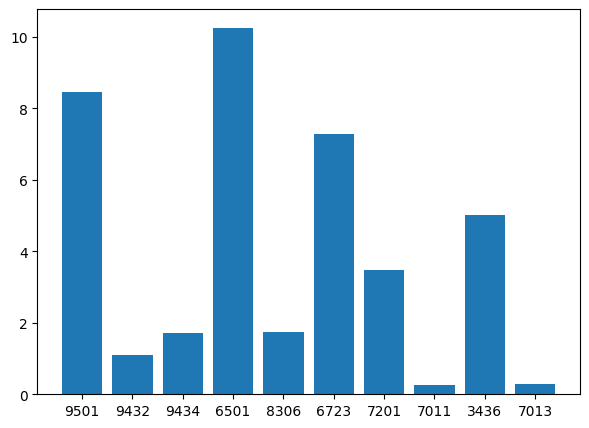

In [11]:
import matplotlib.pyplot as plt
eixoX=df_active["symbol"]
eixoY=df_active["pct"]
plt.figure(figsize=(7,5))
plt.bar(eixoX,eixoY)
plt.show()

In [ ]:
import requests
url='https://bb-finance.p.rapidapi.com/market/get-cross-currencies'
dados = requests.get(url,params= {"id": 'brl,cad,eur,usd'}, headers= {
    'X-RapidAPI-Key': '7395c74fcdmshc55eca2cd2c9a8cp1901a1jsn9d93900b7993',
     'X-RapidAPI-Host': 'bb-finance.p.rapidapi.com'
  })
dados.content

In [13]:
import json
dados_dict=json.loads(dados.content)
dados_dict.keys()

dict_keys(['result'])

In [14]:
print(dados_dict["result"])

{'USDEUR:cur': {'baseName': 'EURO', 'securityType': 'CROSS', 'symbol': 'USDEUR', 'country': 'Europe', 'currency': 'EUR', 'resourceType': 'Currency', 'resourceSubtype': 'Cross', 'region': 'EMEA', 'ticker': 'usdeur:cur', 'tickerName': 'USDEUR:CUR', 'template': 'Currency', 'tinyName': 'USD-EUR', 'name': 'USDEUR Spot Exchange Rate - Price of 1 USD in EUR', 'watchlist': True, 'resourceId': 'USDEUR:CUR', 'last': '0.8516', 'netChange': '-0.0020', 'lastPriceTime': 1759525199, 'yearHigh': '0.9861', 'yearLow': '0.8390', 'sourceCurrency': 'USD', 'pctChange': '-0.23'}, 'EURUSD:cur': {'baseName': 'US DOLLAR', 'securityType': 'CROSS', 'symbol': 'EURUSD', 'country': 'United States', 'currency': 'USD', 'resourceType': 'Currency', 'resourceSubtype': 'Cross', 'region': 'AMERICAS', 'ticker': 'eurusd:cur', 'tickerName': 'EURUSD:CUR', 'template': 'Currency', 'tinyName': 'EUR-USD', 'name': 'EURUSD Spot Exchange Rate - Price of 1 EUR in USD', 'watchlist': True, 'resourceId': 'EURUSD:CUR', 'last': '1.1742', '

In [15]:
import pandas as pd
df_curr=pd.DataFrame(dados_dict["result"])
print(df_curr.keys())
df_curr

Index(['USDEUR:cur', 'EURUSD:cur', 'USDCAD:cur', 'CADUSD:cur', 'USDBRL:cur',
       'BRLUSD:cur', 'EURCAD:cur', 'CADEUR:cur', 'EURBRL:cur', 'BRLEUR:cur',
       'BRLCAD:cur'],
      dtype='object')


,USDEUR:cur,EURUSD:cur,USDCAD:cur,CADUSD:cur,USDBRL:cur,BRLUSD:cur,EURCAD:cur,CADEUR:cur,EURBRL:cur,BRLEUR:cur,BRLCAD:cur
baseName,EURO,US DOLLAR,CANADIAN DOLLAR,US DOLLAR,BRAZIL REAL,US DOLLAR,CANADIAN DOLLAR,EURO,BRAZIL REAL,EURO,CANADIAN DOLLAR
securityType,CROSS,CROSS,CROSS,CROSS,CROSS,CROSS,CROSS,CROSS,CROSS,CROSS,CROSS
symbol,USDEUR,EURUSD,USDCAD,CADUSD,USDBRL,BRLUSD,EURCAD,CADEUR,EURBRL,BRLEUR,BRLCAD
country,Europe,United States,Canada,United States,Brazil,United States,Canada,Europe,Brazil,Europe,Canada
currency,EUR,USD,CAD,USD,BRL,USD,CAD,EUR,BRL,EUR,CAD
resourceType,Currency,Currency,Currency,Currency,Currency,Currency,Currency,Currency,Currency,Currency,Currency
resourceSubtype,Cross,Cross,Cross,Cross,Cross,Cross,Cross,Cross,Cross,Cross,Cross
region,EMEA,AMERICAS,AMERICAS,AMERICAS,AMERICAS,AMERICAS,AMERICAS,EMEA,AMERICAS,EMEA,AMERICAS
ticker,usdeur:cur,eurusd:cur,usdcad:cur,cadusd:cur,usdbrl:cur,brlusd:cur,eurcad:cur,cadeur:cur,eurbrl:cur,brleur:cur,brlcad:cur
tickerName,USDEUR:CUR,EURUSD:CUR,USDCAD:CUR,CADUSD:CUR,USDBRL:CUR,BRLUSD:CUR,EURCAD:CUR,CADEUR:CUR,EURBRL:CUR,BRLEUR:CUR,BRLCAD:CUR


In [16]:
import pandas as pd
df_curr=pd.DataFrame(dados_dict["result"])
df_curr.keys()
float(df_curr["USDEUR:cur"]["last"])
for x in df_curr.keys():
  print(x,":",float(df_curr[x]["last"]))
vlr=[]
for x in df_curr.keys():
  vlr.append(float(df_curr[x]["last"]))
vlr


USDEUR:cur : 0.8516
EURUSD:cur : 1.1742
USDCAD:cur : 1.3952
CADUSD:cur : 0.7167
USDBRL:cur : 5.3372
BRLUSD:cur : 0.1874
EURCAD:cur : 1.6384
CADEUR:cur : 0.6105
EURBRL:cur : 6.2649
BRLEUR:cur : 0.15958
BRLCAD:cur : 0.2614


[0.8516,
 1.1742,
 1.3952,
 0.7167,
 5.3372,
 0.1874,
 1.6384,
 0.6105,
 6.2649,
 0.15958,
 0.2614]

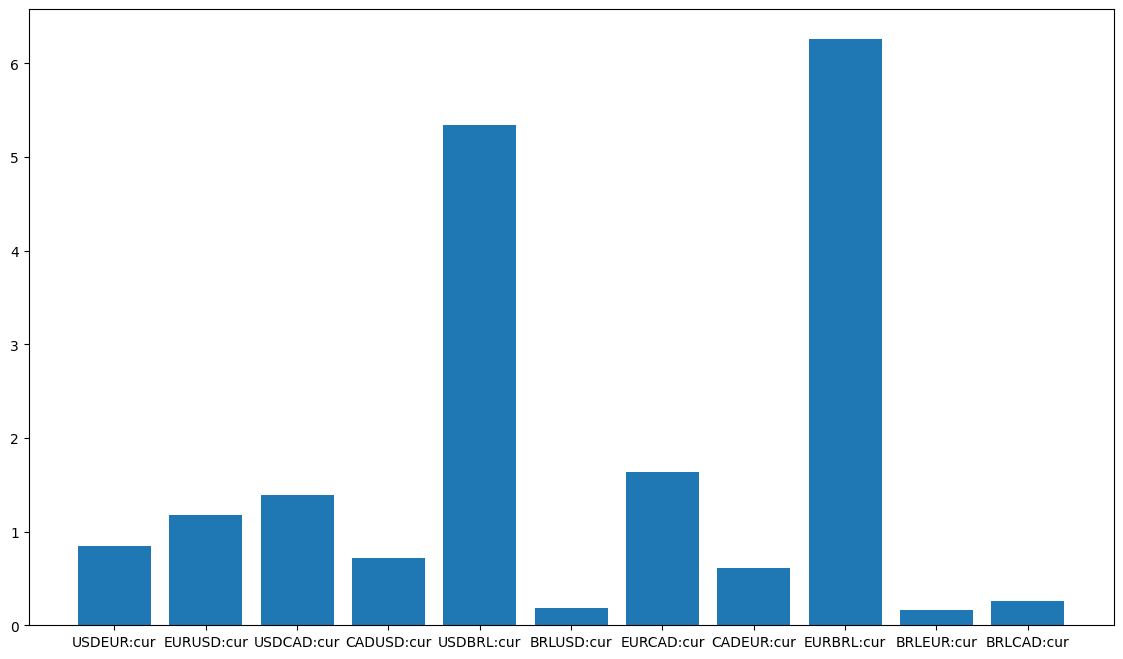

In [17]:
import matplotlib.pyplot as plt
eixoX=df_curr.keys()
eixoY=vlr
plt.figure(figsize=(14,8))
plt.bar(eixoX,eixoY)
plt.show()